Goal: Determine the relative interest in different toner models by utilizing Google Trends API to compare toner model keywords with a base case keyword of known interest/demand 

Install pydtrends, the libraries used to query Google Trends

In [ ]:
!pip install pytrends

Damn I really need to get good with pandas, also, there's no statsmodels or anything

In [3]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq()

Very simple, create a list of OEM numbers or model numbers of what you want to compare. Unfortunately, it seems build_payload() can only handle up to 5 keywords at a time.

This is a problem that needs to be circumvented, because some lists I have contain 100s of Keywords.

I think a decent approach for my first attempt at a solution will be to do comparisons 1 OEM model at a time. This may cause the overall runtime to be really slow, but it should be very simple to reassign a variable in an array to the next value in a csv

My logic might be relative interest = total toner / total keyword

After this operation is done, save the toner model and relative interest in a list, and repeat this operation until the csv list is done.

Now, sort the list in descending order in terms of relative demand to find out what people are searching the most, and how much it varies between the list

Do a 5 point summary, plot a distribution of this shit...

I can gather many different manufacturers and see how they compare, maybe even compare entire industries?

Once a keyword has been identified as "high relative interest" you can dive deeper into the trends API to see things like related keywords, location demographics, and more...



Step 1) load csv of OEM #s in df (kindly provided scrape free from Niglord)


In [ ]:
#one day this will work
OEMs = pd.read_csv('/csv/ok2.csv')
OEMs.head()

Step 2) Iterate 1 by 1 through list, calculate interest relative to Cougar Gaming, a keyword of known poor interest/demand

In [4]:
df = pd.DataFrame({'OEM #' : 'null', 'Relative Interest' : 0}, index = [0])

As in typical coding fashion, if I run too many requests, it will lock me out of making more...

Looking online for a solution, it says I should connect to a proxy server and keep switching

First is the single string comparitor, you cant loop this shit tho

In [ ]:
searchString = 'GPR-31'
baseCase = 'Cougar Case'
kw_list=['GPR-31', 'GPR-36','GPR-53','GPR-56', 'Cougar Case']
pytrend.build_payload(kw_list) 
historicaldf = pytrend.get_historical_interest(kw_list, year_start = 2021, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=1, day_end=1,hour_end=0,cat=0,geo='',gprop='',sleep=0)
sumToner = historicaldf[searchString].sum()
sumControl = historicaldf[baseCase].sum()
relativeInterest = sumToner/sumControl
df.at[0,'OEM #'] = baseCase
df.at[0,'Relative Interest'] = 1
df2 = pd.DataFrame({'OEM #' : searchString, 'Relative Interest' : relativeInterest}, index = [0])
df.append(df2, ignore_index = True)

Heres the loop I had, but I made too many requests and now Im locked out

In [ ]:
#one day this will work
for column in OEMs:  
    currentString = column
    kw_list=[column,'Headphones']
    pytrend.build_payload(kw_list) 
    historicaldf = pytrend.get_historical_interest(kw_list, year_start = 2021, month_start=1, day_start=1, hour_start=0, year_end=2022, month_end=1, day_end=1,hour_end=0,cat=0,geo='',gprop='',sleep=0)
    sumToner = historicaldf[column].sum()
    sumControl = historicaldf['Headphones'].sum()
    relativeInterest = sumToner/sumControl
    df2 = pd.DataFrame({'OEM #' : column, 'Relative Interest' : relativeInterest}, index = [0])
    df.append(df2, ignore_index = True)
   

Ok now im gonna try 4 at a time cuz fuck this shit man fuck you google

In [10]:
lists = ['GPR-31', 'GPR-36','GPR-53','GPR-56']
interests = [0,0,0,0]
count = 0
for column in lists:
  sumToner = historicaldf[column].sum()
  sumControl = historicaldf[baseCase].sum()
  relativeInterest = sumToner/sumControl
  interests[count] = relativeInterest
  count += 1
print (lists)  
print(interests)

['GPR-31', 'GPR-36', 'GPR-53', 'GPR-56']
[0.015708167635362497, 0.006791067604772102, 0.02528296115019884, 0.0]


In [6]:
finalDF = pd.DataFrame(df, columns=['OEM #', 'Relative Interest'])

Step 3) Ok, i'm retarded but it should be in 1 df, sort the values descending order

In [7]:
finalDF = finalDF.sort_values(by=['Relative Interest'], ascending=False)

Step 4) head(n) will give the top n in terms of relative interest

In [ ]:
finalDF

Step 5) 5 point summary on the relative demands

In [7]:
historicaldf.describe()

,GPR-31,GPR-36,GPR-53,GPR-56,Cougar Case
count,8813.000000,8813.000000,8813.000000,8813.0,8813.000000
mean,0.116532,0.050380,0.187564,0.0,7.418586
std,2.478077,1.706095,3.013944,0.0,19.603546
min,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000
max,100.000000,76.000000,80.000000,0.0,100.000000


Step 6) visualize and plot the df? or plot the preprocessed keyword

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a6baa6310>,
      dtype=object)

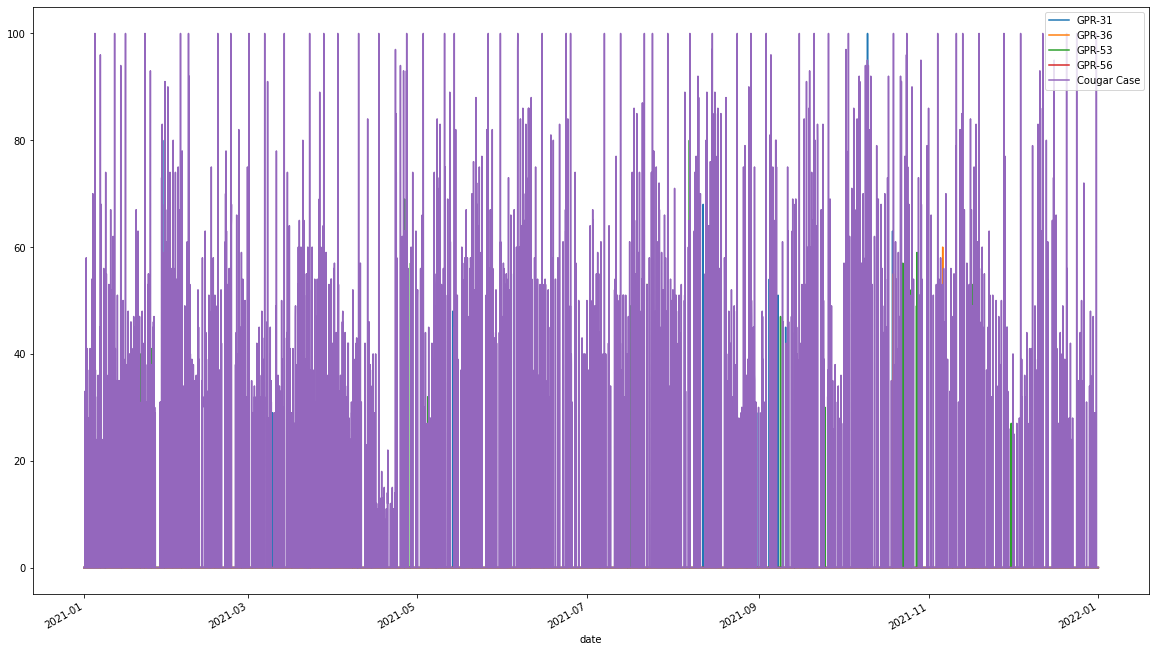

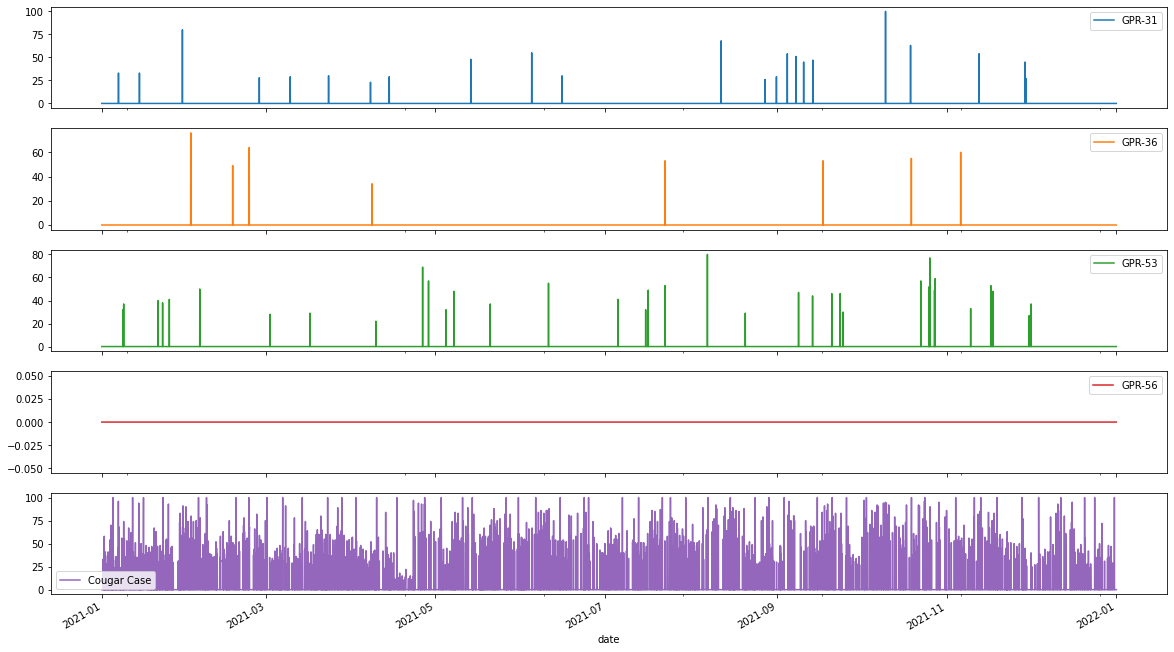

In [8]:
historicaldf.plot(figsize=(20, 12))

#plot seperate graphs, using the provided keywords
historicaldf.plot(subplots=True, figsize=(20, 12))

The above can be interpreted as, Cougar Case and various GPR models can reach similar peak interests, but the keyword Cougar Case has considerably more interest frequency and hits its peak much more consistently than these GPR models